In [248]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

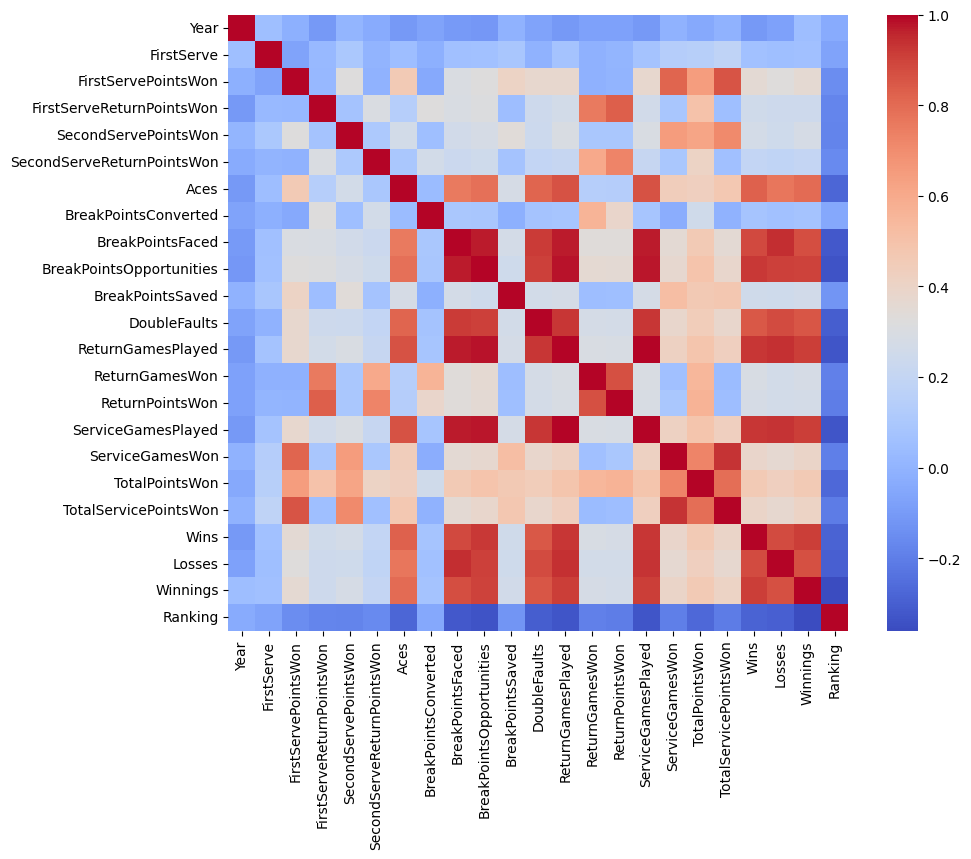

In [249]:
tennis = pd.read_csv('tennis_stats.csv')
tennis_num = tennis.select_dtypes(include=['int', 'float'])
correlation_matrix = tennis_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [250]:
x_attribute = 'TotalPointsWon'
y_attribute = 'FirstServePointsWon'
x = tennis[[x_attribute]]
y = tennis[[y_attribute]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2)
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

[[1.25227365]] [0.08758291]


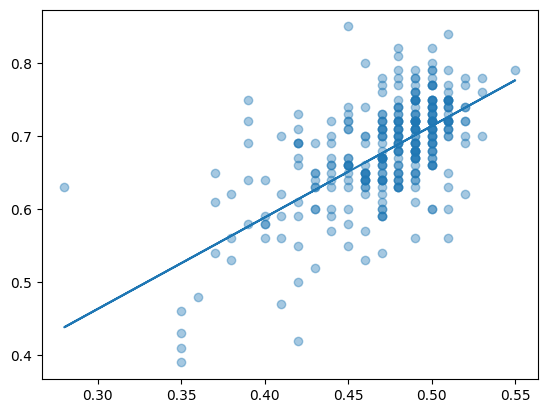

In [251]:
y_predict = lr.predict(test_x)
plt.plot(test_x, np.array([lr.coef_[0][0] * x + lr.intercept_[0] for x in np.array(test_x).flatten()]), '-')
plt.scatter(test_x, test_y, alpha=0.4)
plt.show()

In [252]:
test_y_series = test_y[y_attribute].reset_index(drop='index')
y_predict_series = pd.Series(y_predict.flatten().flatten())
residual = test_y_series - y_predict_series
print(sum(residual**2))

1.0546343979196544
